# Assignment #1 - Naïve Bayes - Iris ( 0813366 黃柏翔 )

## Preprocessing

In [11]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

classes = ['Setoda', 'Versicolour', 'Virginica']
features = ['sepal_length', 'sepal-width', 'petal-length', 'petal-width', 'label']

# Data input
iris_data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data", names = features, index_col=False)

labelencoder = LabelEncoder()
iris_data['label'] = labelencoder.fit_transform(iris_data['label'])

# split data
iris_setosa_data = iris_data[(iris_data['label']==0)]
iris_versicolour_data = iris_data[(iris_data['label']==1)]
iris_virginica_data = iris_data[(iris_data['label']==2)]

# Visualization

----------------------------------------------------------------------

sepal_length avg. value: 5.8433 cm
sepal_length standard deviation: 0.8253 cm


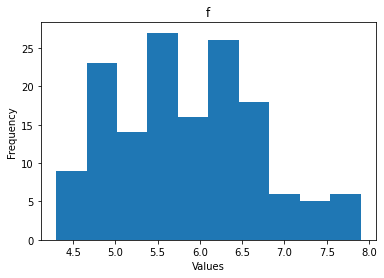

----------------------------------------------------------------------

sepal-width avg. value: 3.0573 cm
sepal-width standard deviation: 0.4344 cm


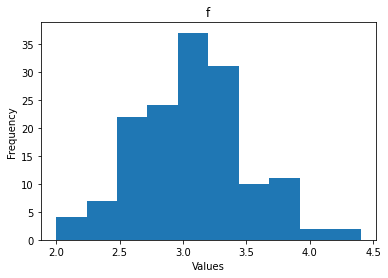

----------------------------------------------------------------------

petal-length avg. value: 3.7580 cm
petal-length standard deviation: 1.7594 cm


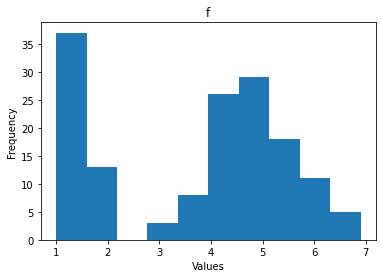

----------------------------------------------------------------------

petal-width avg. value: 1.1993 cm
petal-width standard deviation: 0.7597 cm


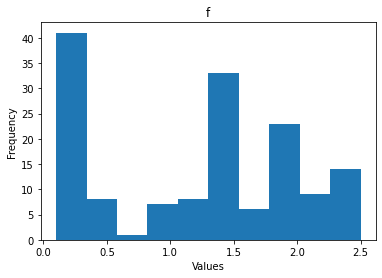

In [55]:
import matplotlib.pyplot as plt

for f in features[:-1]:
    print('-'*70+'\n')
    print(f,'avg. value: %.4f' % np.mean(iris_data[f]),'cm')
    print(f,'standard deviation: %.4f' %np.std(iris_data[f]),'cm')

    n, bins, patches=plt.hist(iris_data[f])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("f")
    
    plt.show()

## - Setoda

Setoda

----------------------------------------------------------------------

sepal_length avg. value: 5.0060 cm
sepal_length standard deviation: 0.3489 cm


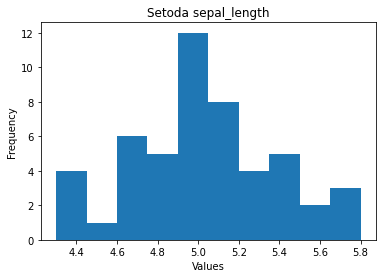

----------------------------------------------------------------------

sepal-width avg. value: 3.4280 cm
sepal-width standard deviation: 0.3753 cm


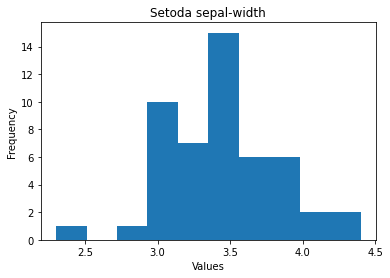

----------------------------------------------------------------------

petal-length avg. value: 1.4620 cm
petal-length standard deviation: 0.1719 cm


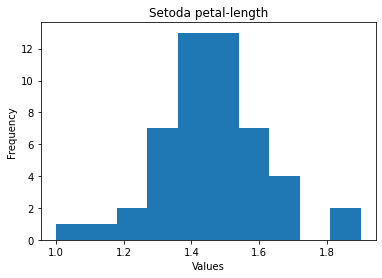

----------------------------------------------------------------------

petal-width avg. value: 0.2460 cm
petal-width standard deviation: 0.1043 cm


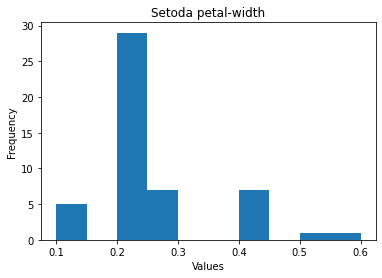

In [12]:
# Setosa
print('Setoda\n')
for f in features[:-1]:
    print('-'*70+'\n')
    print(f,'avg. value: %.4f' % np.mean(iris_setosa_data[f]),'cm')
    print(f,'standard deviation: %.4f' %np.std(iris_setosa_data[f]),'cm')

    n, bins, patches=plt.hist(iris_setosa_data[f])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Setoda"+' '+f)
    
    plt.show()

## - Versicolour

Versicolour

----------------------------------------------------------------------

sepal_length avg. value: 5.9360 cm
sepal_length standard deviation: 0.5110 cm



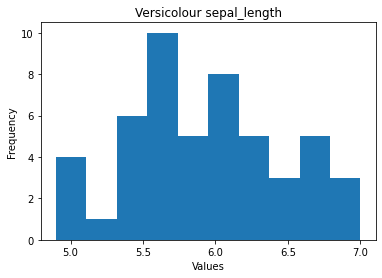

----------------------------------------------------------------------

sepal-width avg. value: 2.7700 cm
sepal-width standard deviation: 0.3106 cm



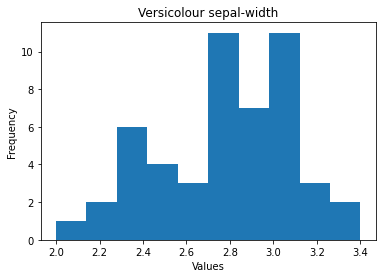

----------------------------------------------------------------------

petal-length avg. value: 4.2600 cm
petal-length standard deviation: 0.4652 cm



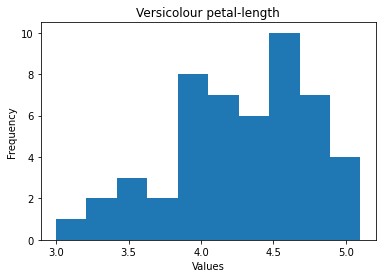

----------------------------------------------------------------------

petal-width avg. value: 1.3260 cm
petal-width standard deviation: 0.1958 cm



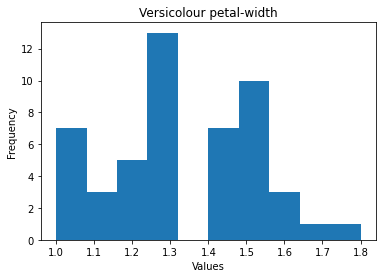

In [13]:
# Versicolour
print('Versicolour\n')
for f in features[:-1]:
    print('-'*70+'\n')
    print(f,'avg. value: %.4f' % np.mean(iris_versicolour_data[f]),'cm')
    print(f,'standard deviation: %.4f' %np.std(iris_versicolour_data[f]),'cm')
    print()
    
    n, bins, patches=plt.hist(iris_versicolour_data[f])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Versicolour"+' '+f)
    plt.show()

## - Virginica

Virginica

----------------------------------------------------------------------

sepal_length avg. value: 6.5880 cm
sepal_length standard deviation: 0.6295 cm



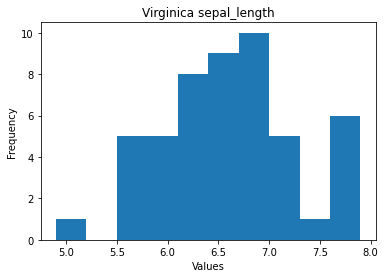

----------------------------------------------------------------------

sepal-width avg. value: 2.9740 cm
sepal-width standard deviation: 0.3193 cm



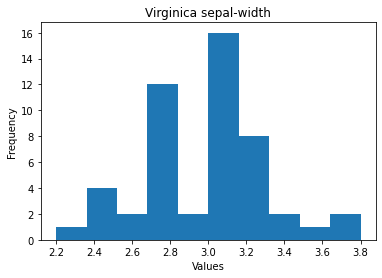

----------------------------------------------------------------------

petal-length avg. value: 5.5520 cm
petal-length standard deviation: 0.5463 cm



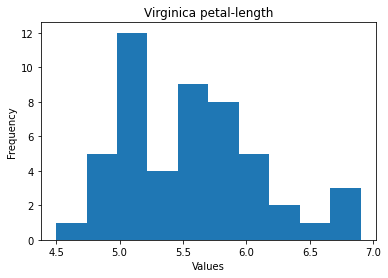

----------------------------------------------------------------------

petal-width avg. value: 2.0260 cm
petal-width standard deviation: 0.2719 cm



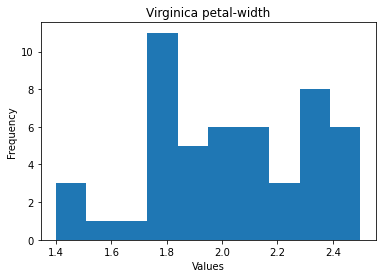

In [14]:
# Virginica
print('Virginica\n')
for f in features[:-1]:
    print('-'*70+'\n')
    print(f,'avg. value: %.4f' % np.mean(iris_virginica_data[f]),'cm')
    print(f,'standard deviation: %.4f' %np.std(iris_virginica_data[f]),'cm')
    print()
    
    n, bins, patches=plt.hist(iris_virginica_data[f])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Virginica"+' '+f)
    plt.show()

# Holdout Validation
Confusion matrice are showed here.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#shuffle
iris_data = iris_data.sample(frac=1, random_state=128).reset_index(drop=True)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.iloc[:,:-1],iris_data.iloc[:,-1] , test_size=0.3)

## - Without smoothing

In [6]:
model = GaussianNB()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict,labels = [0, 1, 2]))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     0.9412    1.0000    0.9697        16
           2     1.0000    0.9333    0.9655        15

    accuracy                         0.9778        45
   macro avg     0.9804    0.9778    0.9784        45
weighted avg     0.9791    0.9778    0.9777        45



## - With smoothing

In [7]:
model = GaussianNB(var_smoothing = 1)
model.fit(X_train,y_train)
predict = model.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict,labels = [0, 1, 2]))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[14  0  0]
 [ 0 14  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     0.9333    0.8750    0.9032        16
           2     0.8750    0.9333    0.9032        15

    accuracy                         0.9333        45
   macro avg     0.9361    0.9361    0.9355        45
weighted avg     0.9346    0.9333    0.9333        45



# K-fold
Confusion matrice are showed here

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


(X, y) = (iris_data.drop('label',axis = 1),iris_data['label'])

kf = KFold(n_splits = 3)
           
np.set_printoptions(suppress=True) 

## - without smoothing

In [9]:
# k-fold cross-validation without smoothing
model = GaussianNB()

cm = np.array([[0,0,0],[0,0,0],[0,0,0]],dtype = int)
scores = []
recall = []
precision = []

for train, test in kf.split(X,y):
    model.fit(X.iloc[train], y[train])
    predict = model.predict(X.iloc[test])
    
    scores.append(model.score(X.iloc[test], y[test]))
    cm += (confusion_matrix(y[test], predict, labels = [0,1,2]))
    recall.append(recall_score(y[test],predict, average = None))
    precision.append(precision_score(y[test], predict, average = None))
    
print('confusion matrix\n',cm/3)
print('Accuracy: %.4f' % (np.mean(scores)))
print('Recall: %.4f' % np.mean(recall))
print('precision: %.4f' % np.mean(precision))

confusion matrix
 [[16.66666667  0.          0.        ]
 [ 0.         16.          0.66666667]
 [ 0.          1.33333333 15.33333333]]
Accuracy: 0.9600
Recall: 0.9550
precision: 0.9623


## - with smoothing

In [10]:
# k-fold cross-validation without smoothing
model = GaussianNB(var_smoothing = 1)

cm = np.array([[0,0,0],[0,0,0],[0,0,0]],dtype = int)
scores = []
recall = []
precision = []

for train, test in kf.split(X,y):
    model.fit(X.iloc[train], y[train])
    predict = model.predict(X.iloc[test])
    
    scores.append(model.score(X.iloc[test], y[test]))
    cm += (confusion_matrix(y[test], predict, labels = [0,1,2]))
    recall.append(recall_score(y[test],predict, average = None))
    precision.append(precision_score(y[test], predict, average = None))
    
print('confusion matrix\n',cm/3)
print('Accuracy: %.4f' % (np.mean(scores)))
print('Recall: %.4f' % np.mean(recall))
print('precision: %.4f' % np.mean(precision))

confusion matrix
 [[16.66666667  0.          0.        ]
 [ 0.         15.33333333  1.33333333]
 [ 0.          2.33333333 14.33333333]]
Accuracy: 0.9267
Recall: 0.9288
precision: 0.9363


# Result
|           |holdout-L|holdout-NL|k-fold-L|k-fold-NL
|-----------|:------:|:------:|:------:|:------:
|Accuracy|0.9333|0.9778|0.9267|0.9600
|Recall|0.9361|0.9777|0.9288|0.9550
|Precision|0.9361|0.9804|0.9363|0.9623

# Comparison & Conclusion

holdout validation的表現略勝K-fold。

在這個資料集中，使用laplace smoothing時，performance較差。
可能是因為訓練時的樣本數不夠大，並不能直接將多加上的alpha忽略，因此會導致結果有偏差。

# Question

Versicolour

----------------------------------------------------------------------

petal-length avg. value: 4.2600 cm
petal-length standard deviation: 0.4652 cm



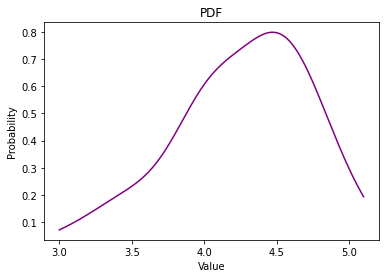

In [56]:
print('Versicolour\n')

f = 'petal-length'

print('-'*70+'\n')
print(f,'avg. value: %.4f' % np.mean(iris_versicolour_data[f]),'cm')
print(f,'standard deviation: %.4f' %np.std(iris_versicolour_data[f]),'cm')
print()

import scipy.stats as stats

kde = stats.gaussian_kde(iris_versicolour_data[f])
pos = np.linspace(min(iris_versicolour_data[f]), max(iris_versicolour_data[f]), 50000)
plt.title('PDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.plot(pos, kde(pos), color='purple')